In [8]:
# CFD RNN cannot solve TF task, and vice versa

import sys
sys.path.append('../')

from low_rank_rnns.modules import *
from low_rank_rnns import CFDTF, CFD, stats, plotting as plot, helpers, rankone, ranktwo, clustering

from matplotlib import pyplot as plt

# load a CFD RNN

In [2]:
size = 100
noise_std = 5e-2
alpha = .2
lr = 1e-2


In [18]:
# load a full-rank RNN

net = FullRankRNN(3, size, 1, noise_std, alpha)
net.load_state_dict(torch.load(f'../models/CFD{size}.pt', map_location='cpu'))

x_train, y_train, mask_train, cohAll_train, x_val, y_val, mask_val, cohAll_val = CFD.generate_checker_data(5000)

loss, acc, out, decisions, target_decisions, traj = CFD.test_checker(net, x_val, y_val, mask_val)
print(f'loss={loss:.3f}, acc={acc:.3f}')

loss=0.024, acc=1.000


In [19]:

def plot_psth(traj, decisions, cohAll_val):
    traj1 = traj.detach().numpy()
    traj1 = np.tanh(traj1)
    decisions1 = decisions.detach().numpy()

    cfdRL = traj1[np.logical_and(decisions1 == -1, cohAll_val > 0),:,:]
    cfdRR = traj1[np.logical_and(decisions1 == 1, cohAll_val > 0),:,:]
    cfdGL = traj1[np.logical_and(decisions1 == -1, cohAll_val < 0),:,:]
    cfdGR = traj1[np.logical_and(decisions1 == 1, cohAll_val < 0),:,:]

    for n in range(30,40):
        plt.figure()
        plt.plot(np.mean(cfdRL,axis = 0)[:,n]+0.1, 'r-')
        plt.plot(np.mean(cfdRR,axis = 0)[:,n], 'r--')
        plt.plot(np.mean(cfdGL,axis = 0)[:,n]+0.1, 'g-')
        plt.plot(np.mean(cfdGR,axis = 0)[:,n], 'g--')
        plt.title("CFD unit: " + str(n))

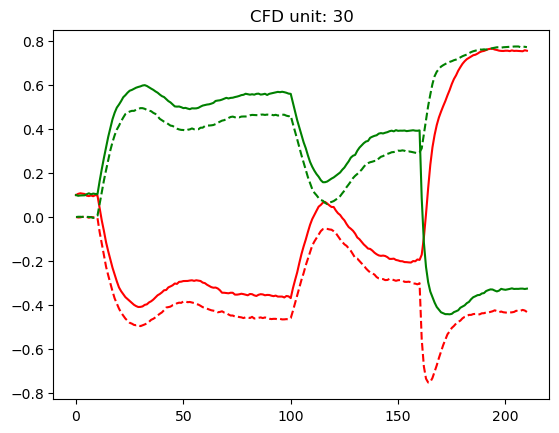

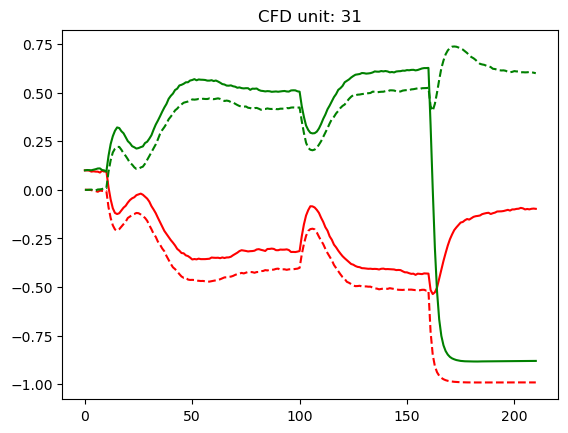

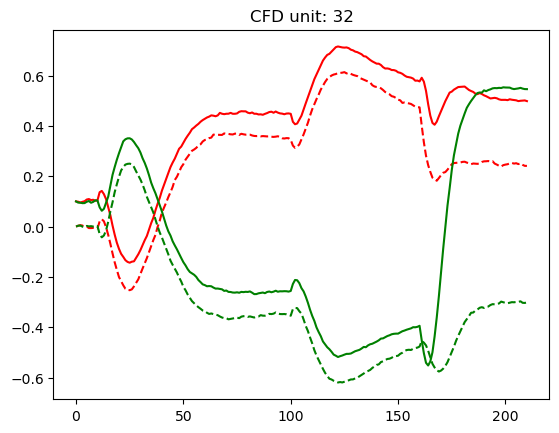

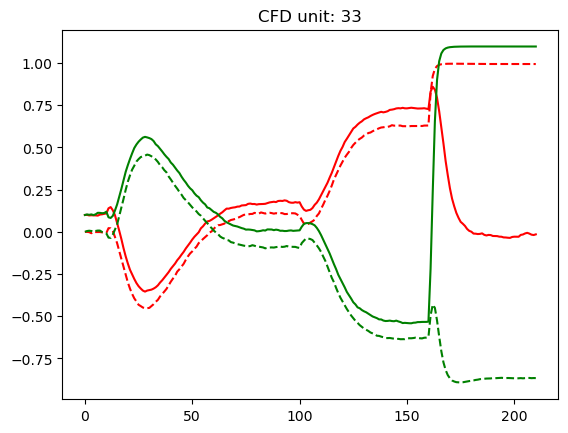

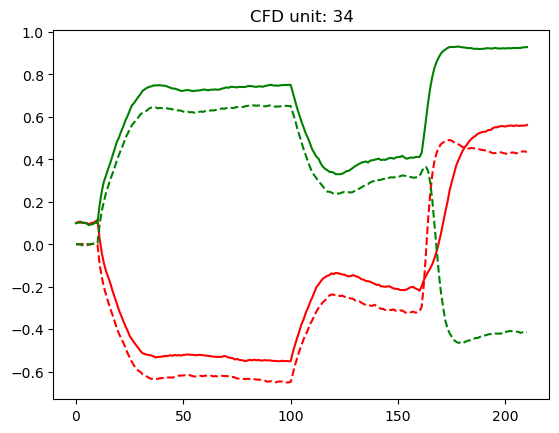

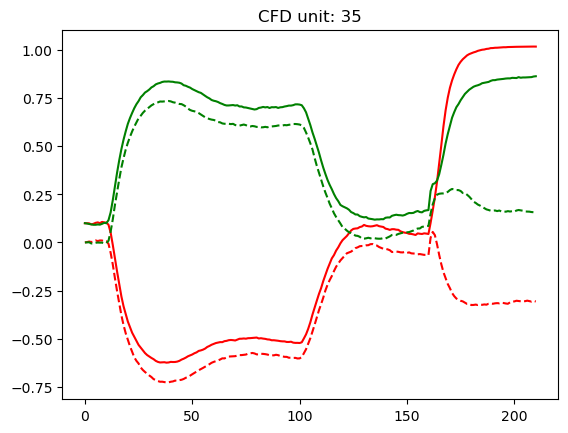

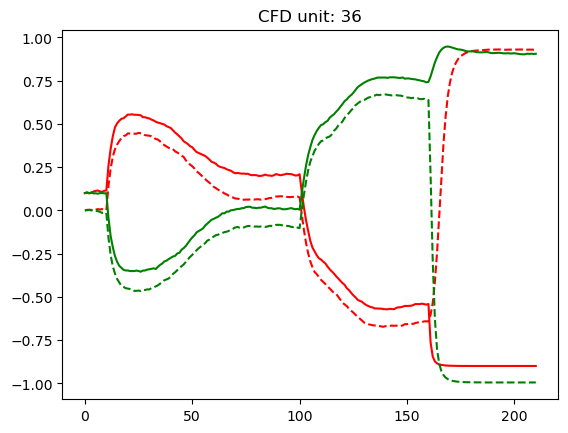

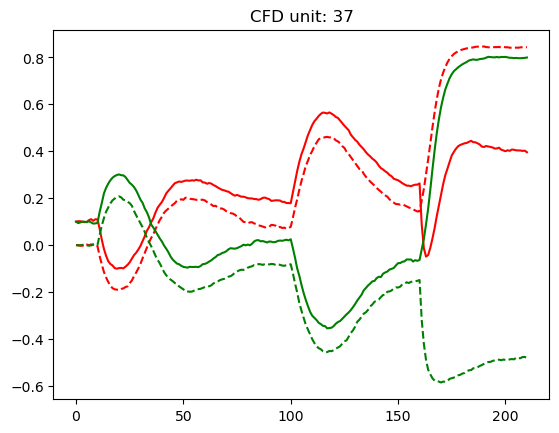

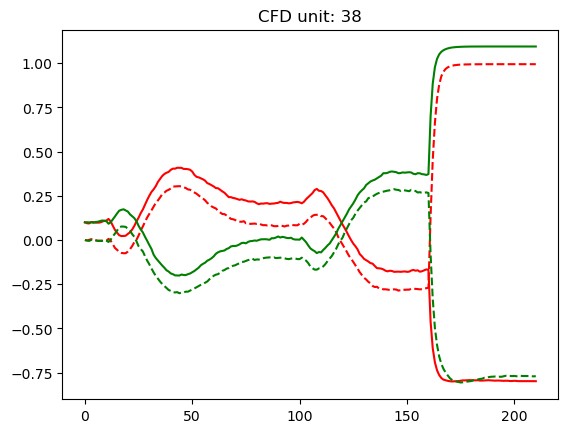

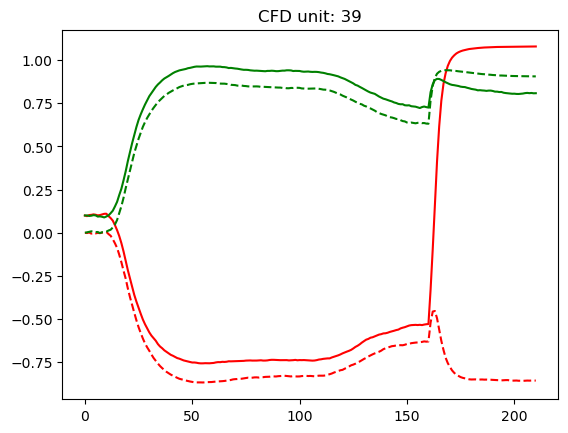

In [20]:
plot_psth(traj, decisions, cohAll_val)

In [21]:
# make CFD RNN to solve TF task
x_train, y_train, mask_train, cohAll_train, taskType_train, x_val, y_val, mask_val, cohAll_val, taskType_val = CFDTF.generate_checker_data(5000)


In [22]:
CFDx_val = x_val[taskType_val == 1,:,:]
CFDy_val = y_val[taskType_val == 1,:,:]
CFDmask_val = mask_val[taskType_val == 1,:,:]
CFDcohAll_val = cohAll_val[taskType_val == 1]
TFx_val = x_val[taskType_val == 2,:,:]
TFy_val = y_val[taskType_val == 2,:,:]
TFmask_val = mask_val[taskType_val == 2,:,:]
TFcohAll_val = cohAll_val[taskType_val == 2]


In [23]:
# CFD RNN solve CFD task
loss, acc, out, decisions, target_decisions, traj = CFD.test_checker(net, CFDx_val, CFDy_val, CFDmask_val)
print(f'loss={loss:.3f}, acc={acc:.3f}')

loss=0.024, acc=1.000


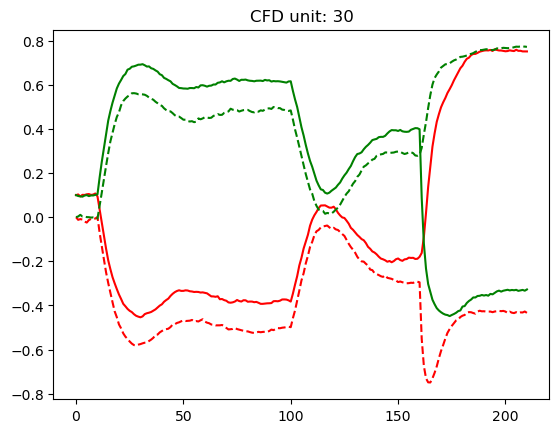

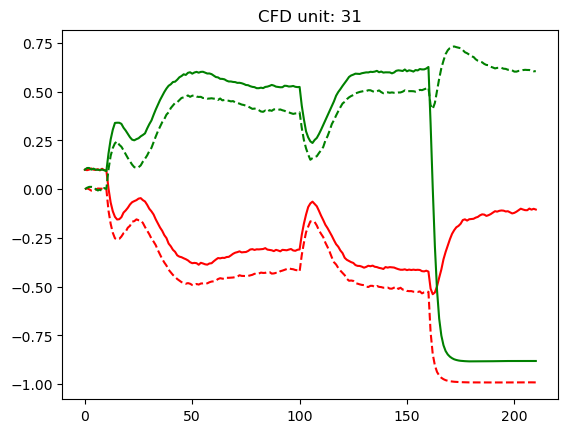

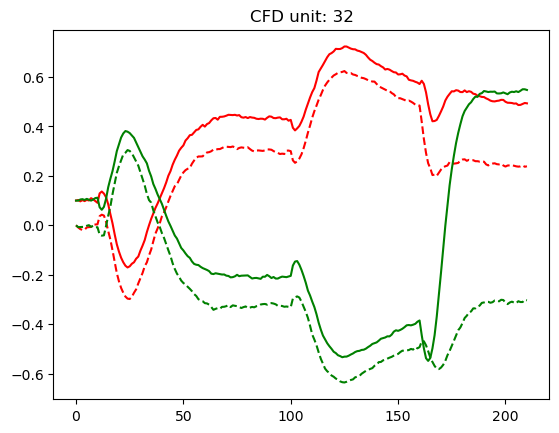

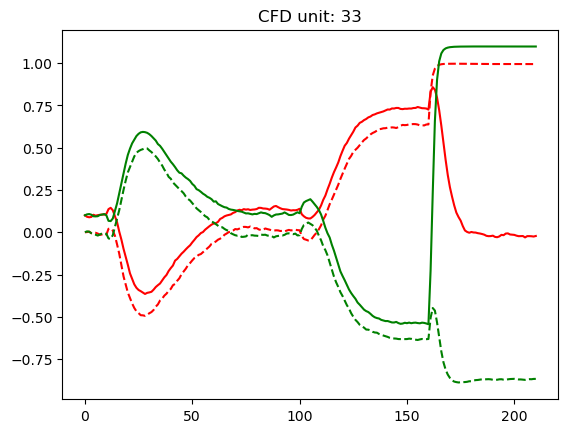

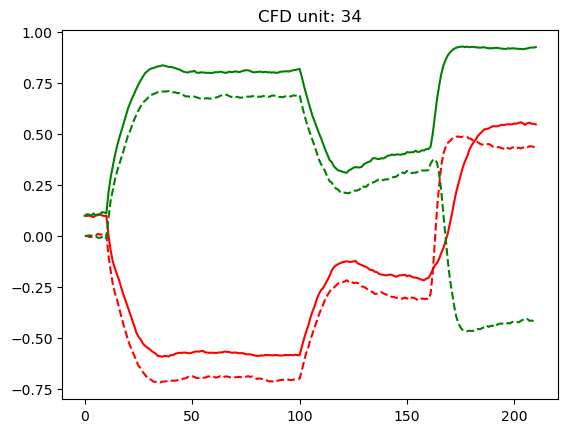

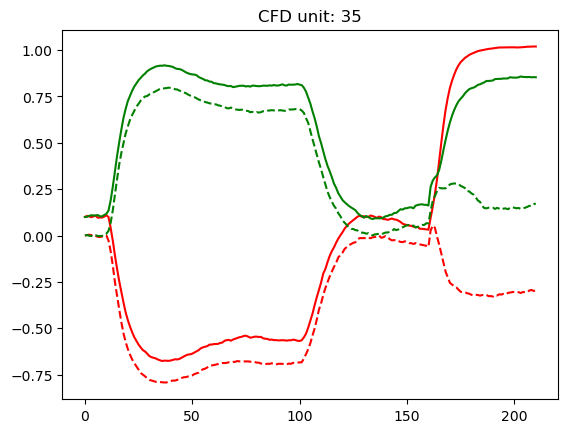

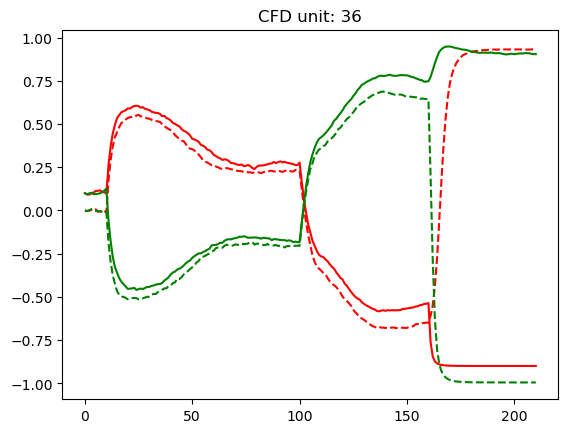

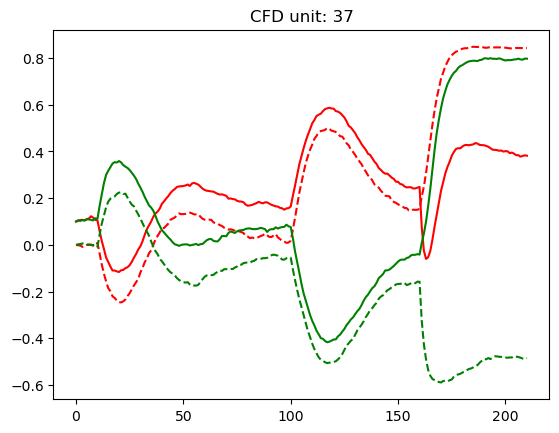

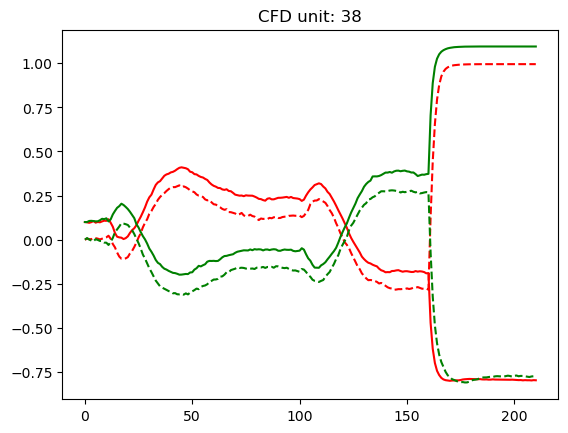

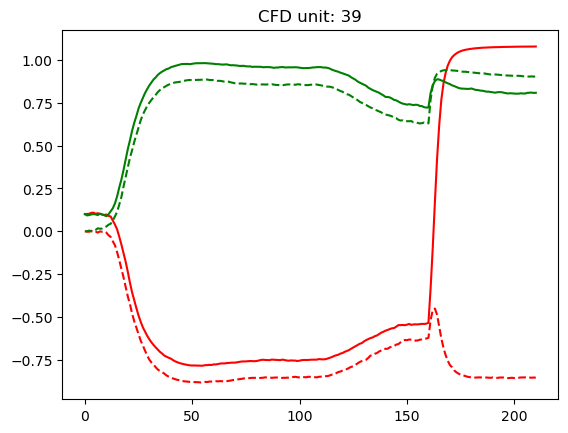

In [24]:
# plot psth
plot_psth(traj, decisions, CFDcohAll_val)


In [25]:
# CFD RNN solve TF task
loss, acc, out, decisions, target_decisions, traj = CFD.test_checker(net, TFx_val, TFy_val, TFmask_val)
print(f'loss={loss:.3f}, acc={acc:.3f}')

loss=1.665, acc=0.502


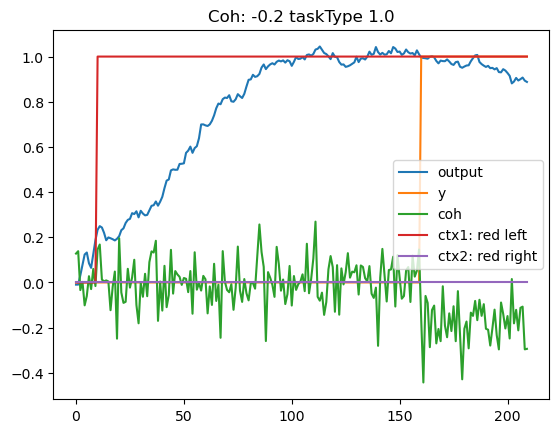

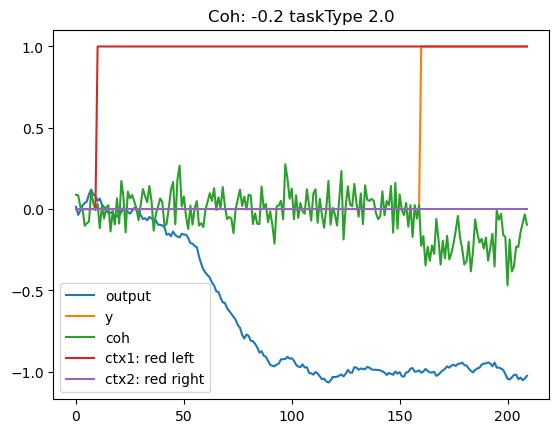

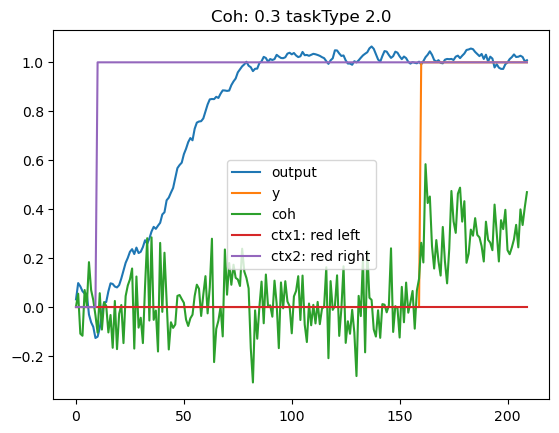

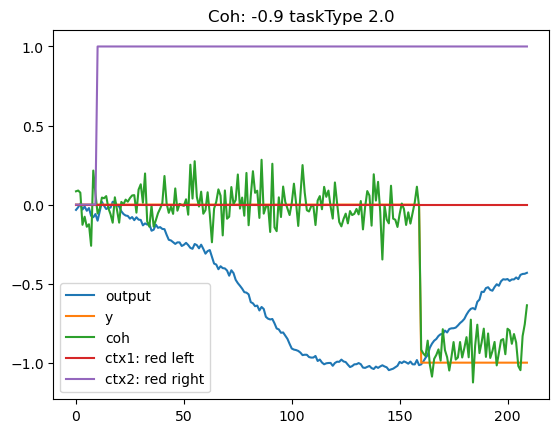

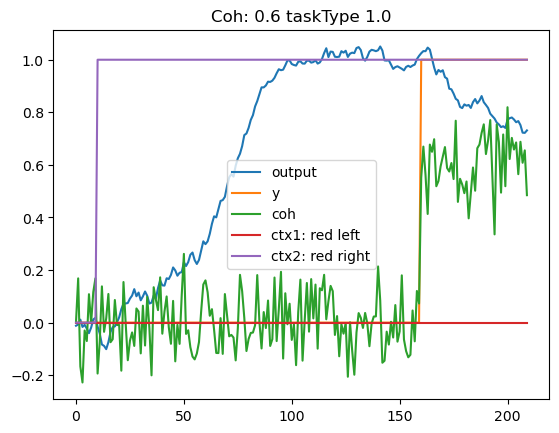

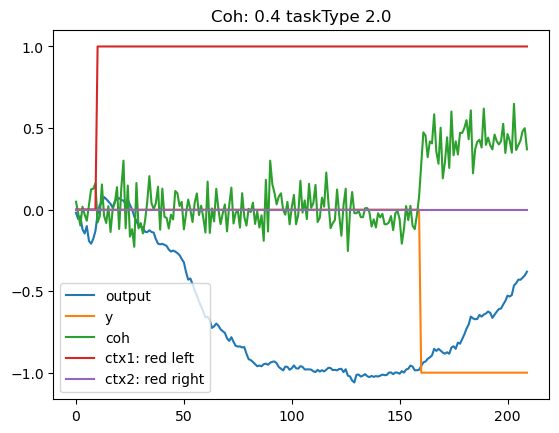

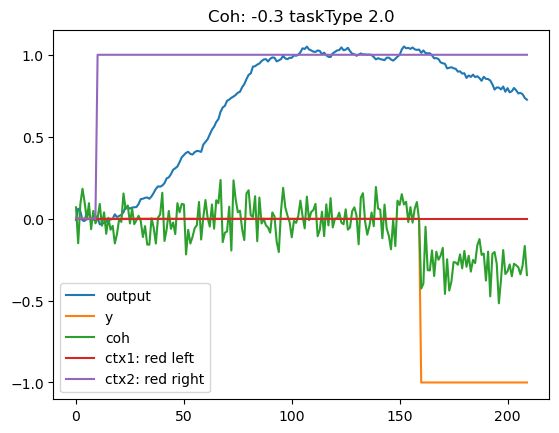

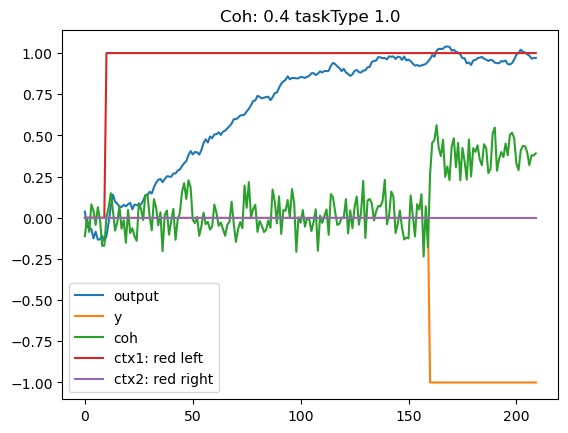

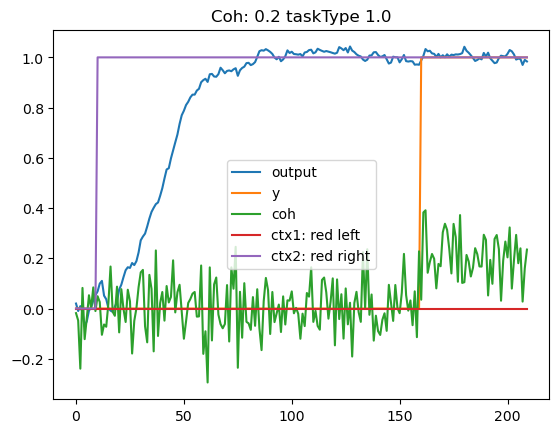

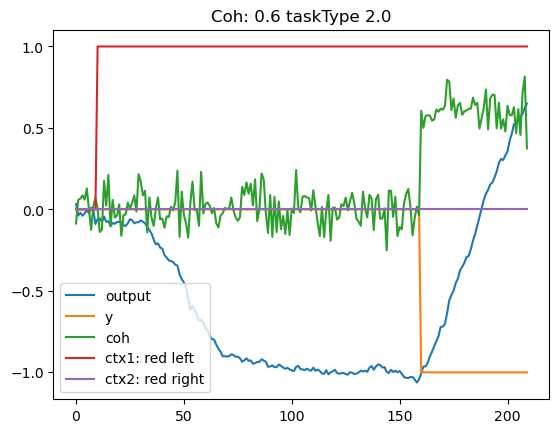

In [27]:
for n in range(10,20):
    plt.figure()
    aa = out.detach().numpy()
    plt.plot(aa[n,:,:], label = 'output')
    plt.plot(TFy_val[n,:,:], label = 'y')

    plt.plot(TFx_val[n,:,0], label = 'coh')
    plt.plot(TFx_val[n,:,1], label = 'ctx1: red left')
    plt.plot(TFx_val[n,:,2], label = 'ctx2: red right')
    plt.title('Coh: ' + str(TFcohAll_val[n]) + ' taskType ' + str(taskType_val[n]))
    plt.legend()
    plt.show()

# load a TF RNN

In [9]:
# load model
x_train, y_train, mask_train, cohAll_train, x_val, y_val, mask_val, cohAll_val = TF.generate_checker_data(5000)

netTF = FullRankRNN(3, size, 1, noise_std, alpha)
netTF.load_state_dict(torch.load(f'../models/TF{size}.pt', map_location='cpu'))
loss, acc, out, decisions, target_decisions, traj = TF.test_checker(netTF, x_val, y_val, mask_val)
print(f'loss={loss:.3f}, acc={acc:.3f}')

loss=0.114, acc=0.994


In [10]:
# make TF RNN to solve CFD task
x_train, y_train, mask_train, cohAll_train, x_val, y_val, mask_val, cohAll_val = CFD.generate_checker_data(5000)
loss, acc, out, decisions, target_decisions, traj = TF.test_checker(netTF, x_val, y_val, mask_val)
print(f'loss={loss:.3f}, acc={acc:.3f}')

loss=1.041, acc=0.554
